In [1]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.pyplot import figure
from random import random
from mpl_toolkits.axes_grid1 import host_subplot
from pylab import rcParams

# P1

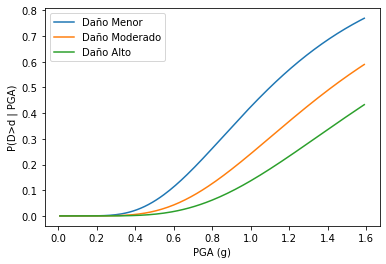

In [2]:
# axial: parametros con mayor probabilidad de falla
smi_menor = 1.1
smi_moderado = 1.42
smi_alto = 1.73
beta_tot = 0.5

def lognorm_pga(pga,beta_tot,smi): #argumento de phi
    return 1/beta_tot*np.log(pga/smi)

pga = np.arange(0.01,1.6,0.01)
cdf1 = norm.cdf(lognorm_pga(pga,beta_tot,smi_menor))
cdf2 = norm.cdf(lognorm_pga(pga,beta_tot,smi_moderado))
cdf3 = norm.cdf(lognorm_pga(pga,beta_tot,smi_alto))
plt.plot(pga,cdf1,label='Daño Menor')
plt.plot(pga,cdf2,label='Daño Moderado')
plt.plot(pga,cdf3,label='Daño Alto')
plt.xlabel('PGA (g)')
plt.ylabel('P(D>d | PGA)')
plt.legend()
plt.savefig('curva-fragilidad.jpg')
plt.show()

# P2

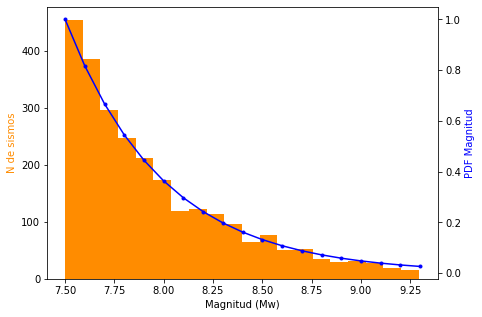

In [7]:
# Gutenberg Richter PDF
a = 5.36
b = 0.88
m_min = 7.5
m_max = 9.3

def f_M(m): #PDF GR
    return b * np.log(10)*10**(-b*(m-m_min))

# muestreo aleatorio
itera = 10000 #iteraciones MC
f_M_max = f_M(m_min)
valores = []

for i in range(itera):
    m_rand = m_min + (m_max - m_min)*random()
    prob_m_rand = f_M(m_rand)/f_M_max
    muestra = random()
    if muestra < prob_m_rand:
        valores.append(m_rand)

M = np.arange(m_min, m_max, 0.1)

host = host_subplot(111)
par = host.twinx()
host.set_xlabel('Magnitud (Mw)')
par.set_ylabel('PDF Magnitud')
host.set_ylabel("N de sismos")
p1 = host.hist(valores,20,color='darkorange')
p2, = par.plot(M, f_M(M)/f_M_max,'b.-')
host.yaxis.get_label().set_color('darkorange')
par.yaxis.get_label().set_color(p2.get_color())
rcParams["figure.figsize"] = (7,5)
plt.savefig('muestreo-sismos.jpg')
plt.show()

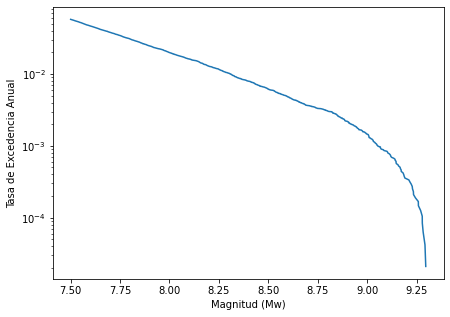

In [5]:
# Curva de excedencia

lifo_sort = np.flip(np.sort(valores))
n = len(valores)
lambda_m_min = 10**(a-b*m_min)
prob_ex = np.arange(1,n+1)/n * lambda_m_min
lambda_m_min = 10**(a-b*m_min)

plt.semilogy(lifo_sort,prob_ex)
plt.xlabel('Magnitud (Mw)')
plt.ylabel('Tasa de Excedencia Anual')
plt.savefig('curva-excedencia.jpg')
plt.show()

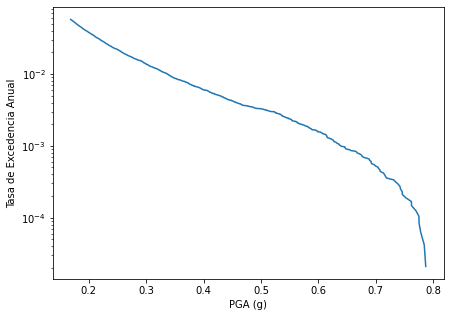

In [6]:
# Cornell

R = 63 #km
def PGA(M,R):
    return np.exp(-0.152 + 0.859*M - 1.803*np.log(R+25))

# curva de amenaza

plt.semilogy(PGA(lifo_sort,R),prob_ex)
plt.xlabel('PGA (g)')
plt.ylabel('Tasa de Excedencia Anual')
plt.savefig('curva-amenaza.jpg')
plt.show()

# P3-4

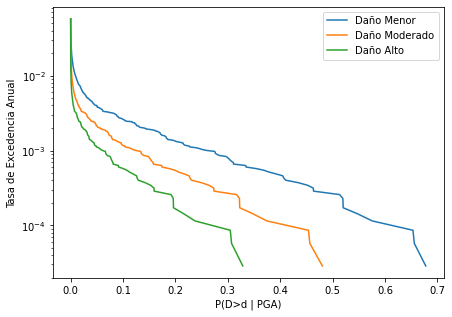

In [185]:
pga = PGA(lifo_sort,R)
cdf1 = norm.cdf(lognorm_pga(pga,beta_tot,smi_menor))
cdf2 = norm.cdf(lognorm_pga(pga,beta_tot,smi_moderado))
cdf3 = norm.cdf(lognorm_pga(pga,beta_tot,smi_alto))
plt.semilogy(cdf1,prob_ex,label='Daño Menor')
plt.semilogy(cdf2,prob_ex,label='Daño Moderado')
plt.semilogy(cdf3,prob_ex,label='Daño Alto')
plt.xlabel('P(D>d | PGA)')
plt.ylabel('Tasa de Excedencia Anual')
plt.legend()
plt.savefig('curva-riesgo.jpg')
plt.show()

In [9]:
PGA(m_min,R)

0.16827793753183298